In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv(r"C:\Users\PC\Desktop\netflix_titles.csv", index_col = 'show_id')
df.tail()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


# Distribution of Content Rating on Netflix

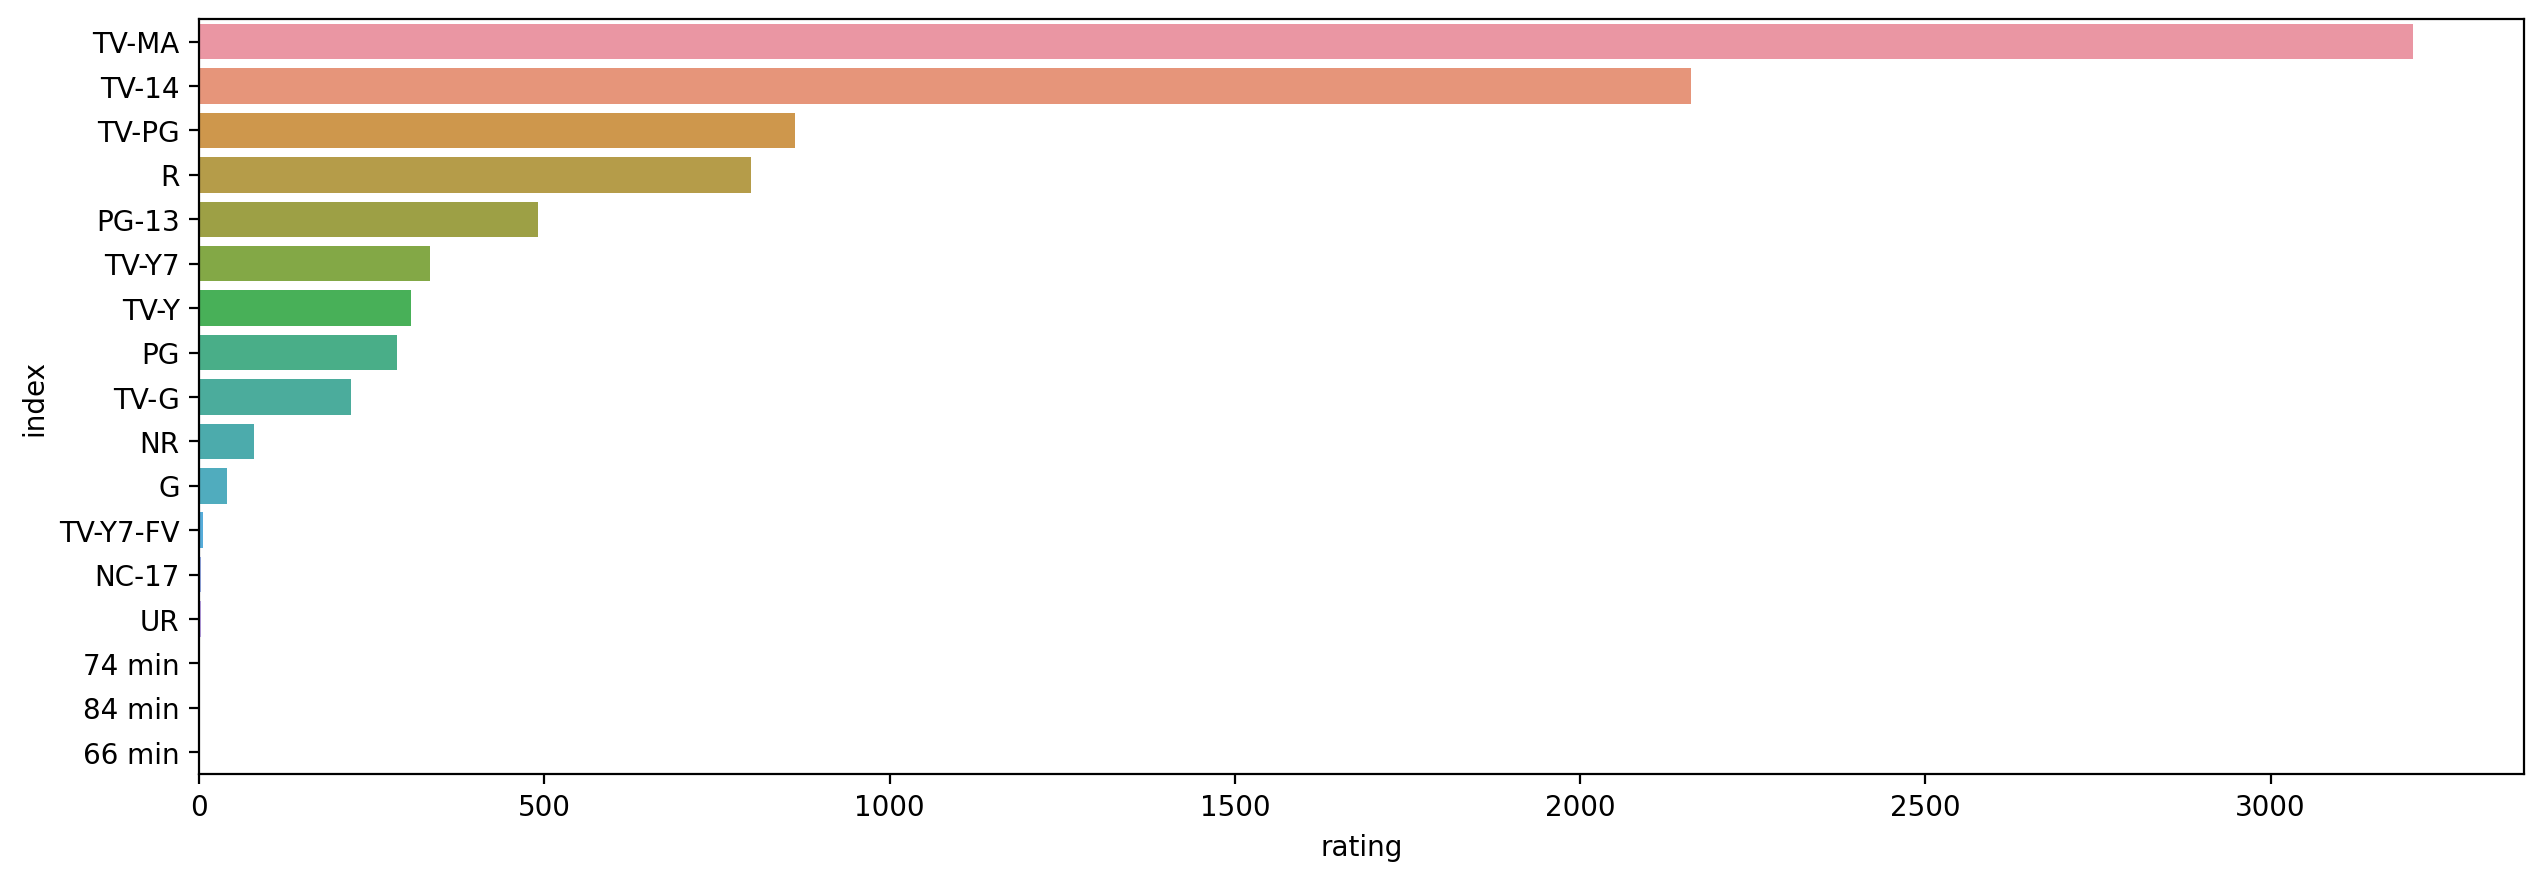

In [39]:
df1 = df.rating.value_counts().reset_index()
plt.figure(figsize=(15,5),dpi=200)
sns.barplot(data=df1,x='rating',y='index');

# Top famous directors on Netflix

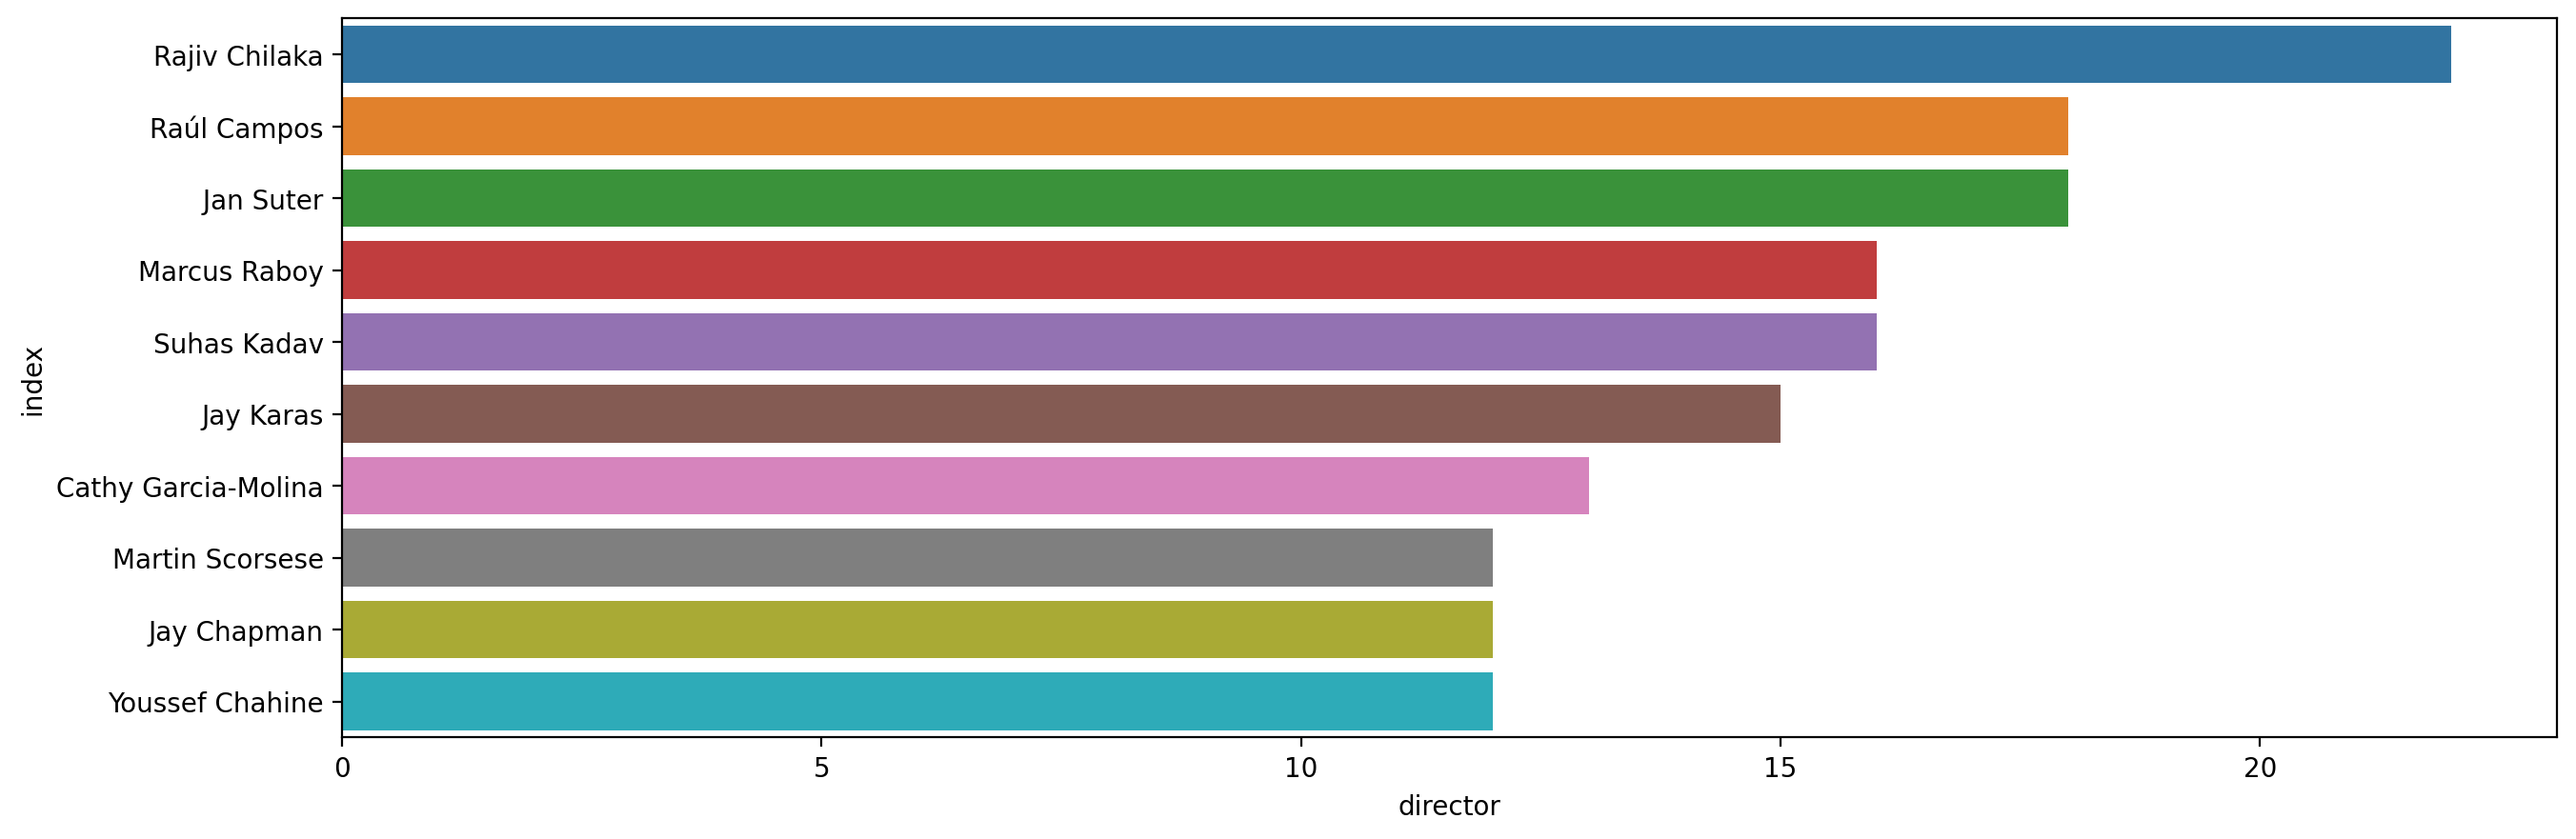

In [84]:
df2 = df['director'].str.split(',',expand=True).stack().reset_index(name='director').drop(columns=['level_1','show_id'])
df2 = df2['director'].value_counts().reset_index()
df2 = df2.head(10)
plt.figure(figsize=(15,5),dpi=200)
sns.barplot(data=df2,x='director',y='index');

# Top famous actors on Netflix

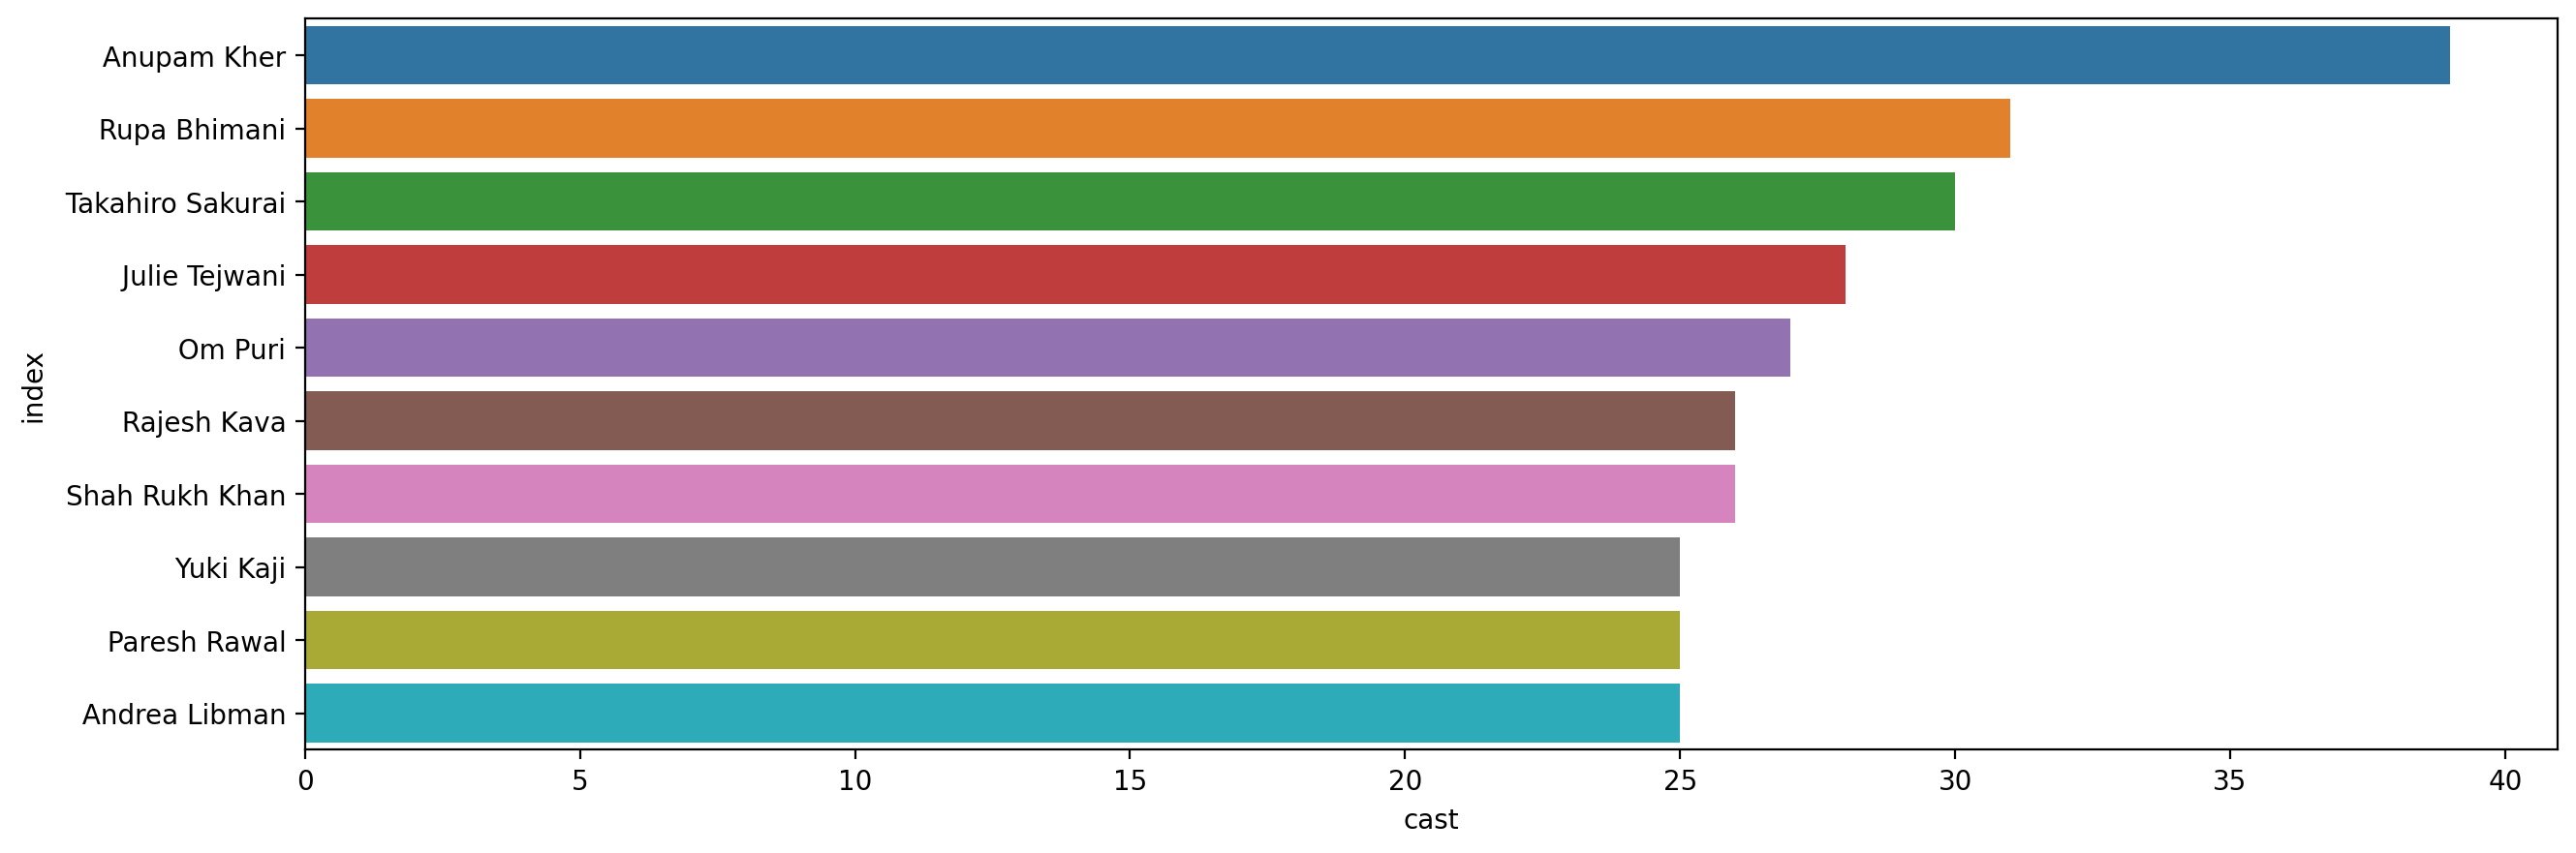

In [85]:
df2 = df['cast'].str.split(',',expand=True).stack().reset_index(name='cast').drop(columns=['level_1','show_id'])
df2 = df2['cast'].value_counts().reset_index()
df2 = df2.head(10)
plt.figure(figsize=(15,5),dpi=200)
sns.barplot(data=df2,x='cast',y='index');

# Distribution of country on Netflix

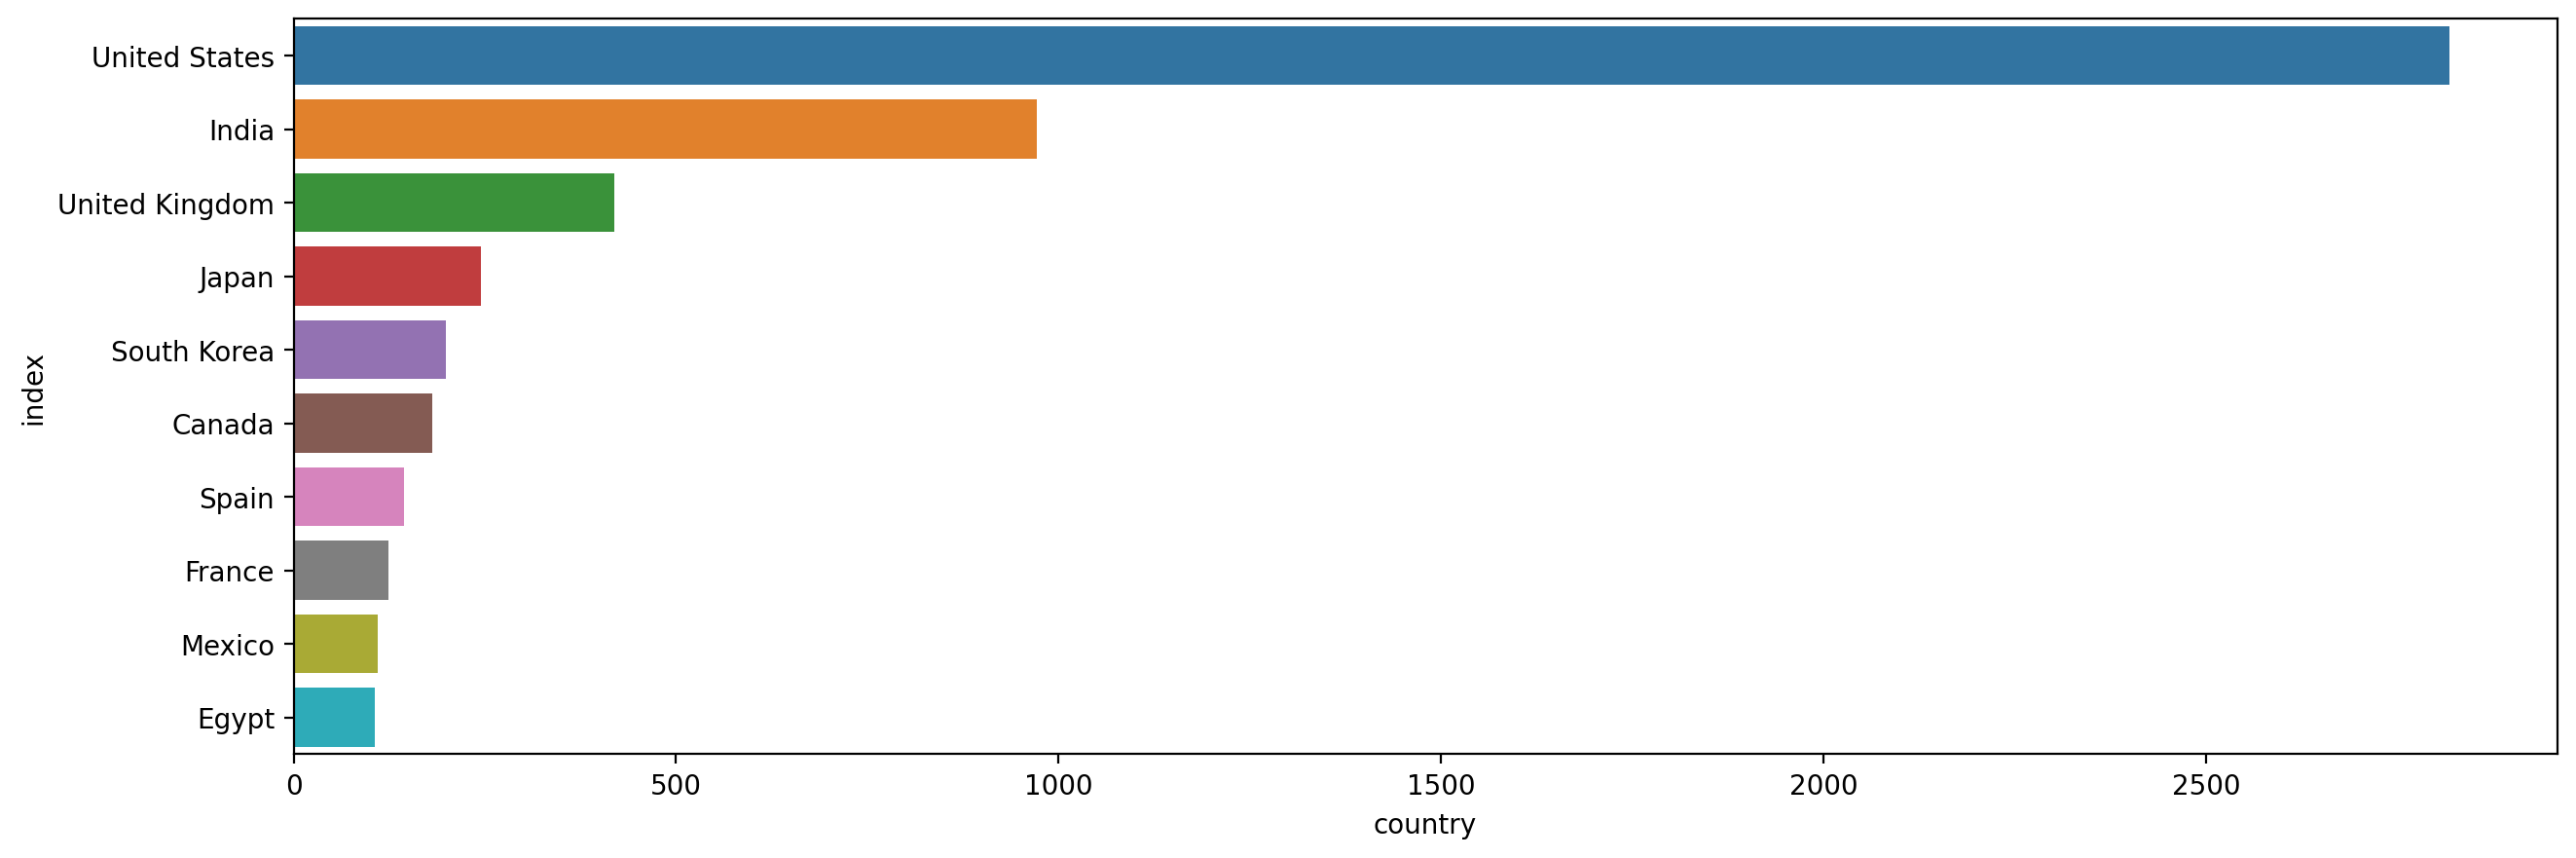

In [200]:
df3 = df.country.value_counts().reset_index()
df3 = df3.head(10)
plt.figure(figsize=(15,5),dpi=200)
sns.barplot(data=df3,x='country',y='index');

# Distribution of content on Netflix by year

Text(0.5, 0, 'Year by year')

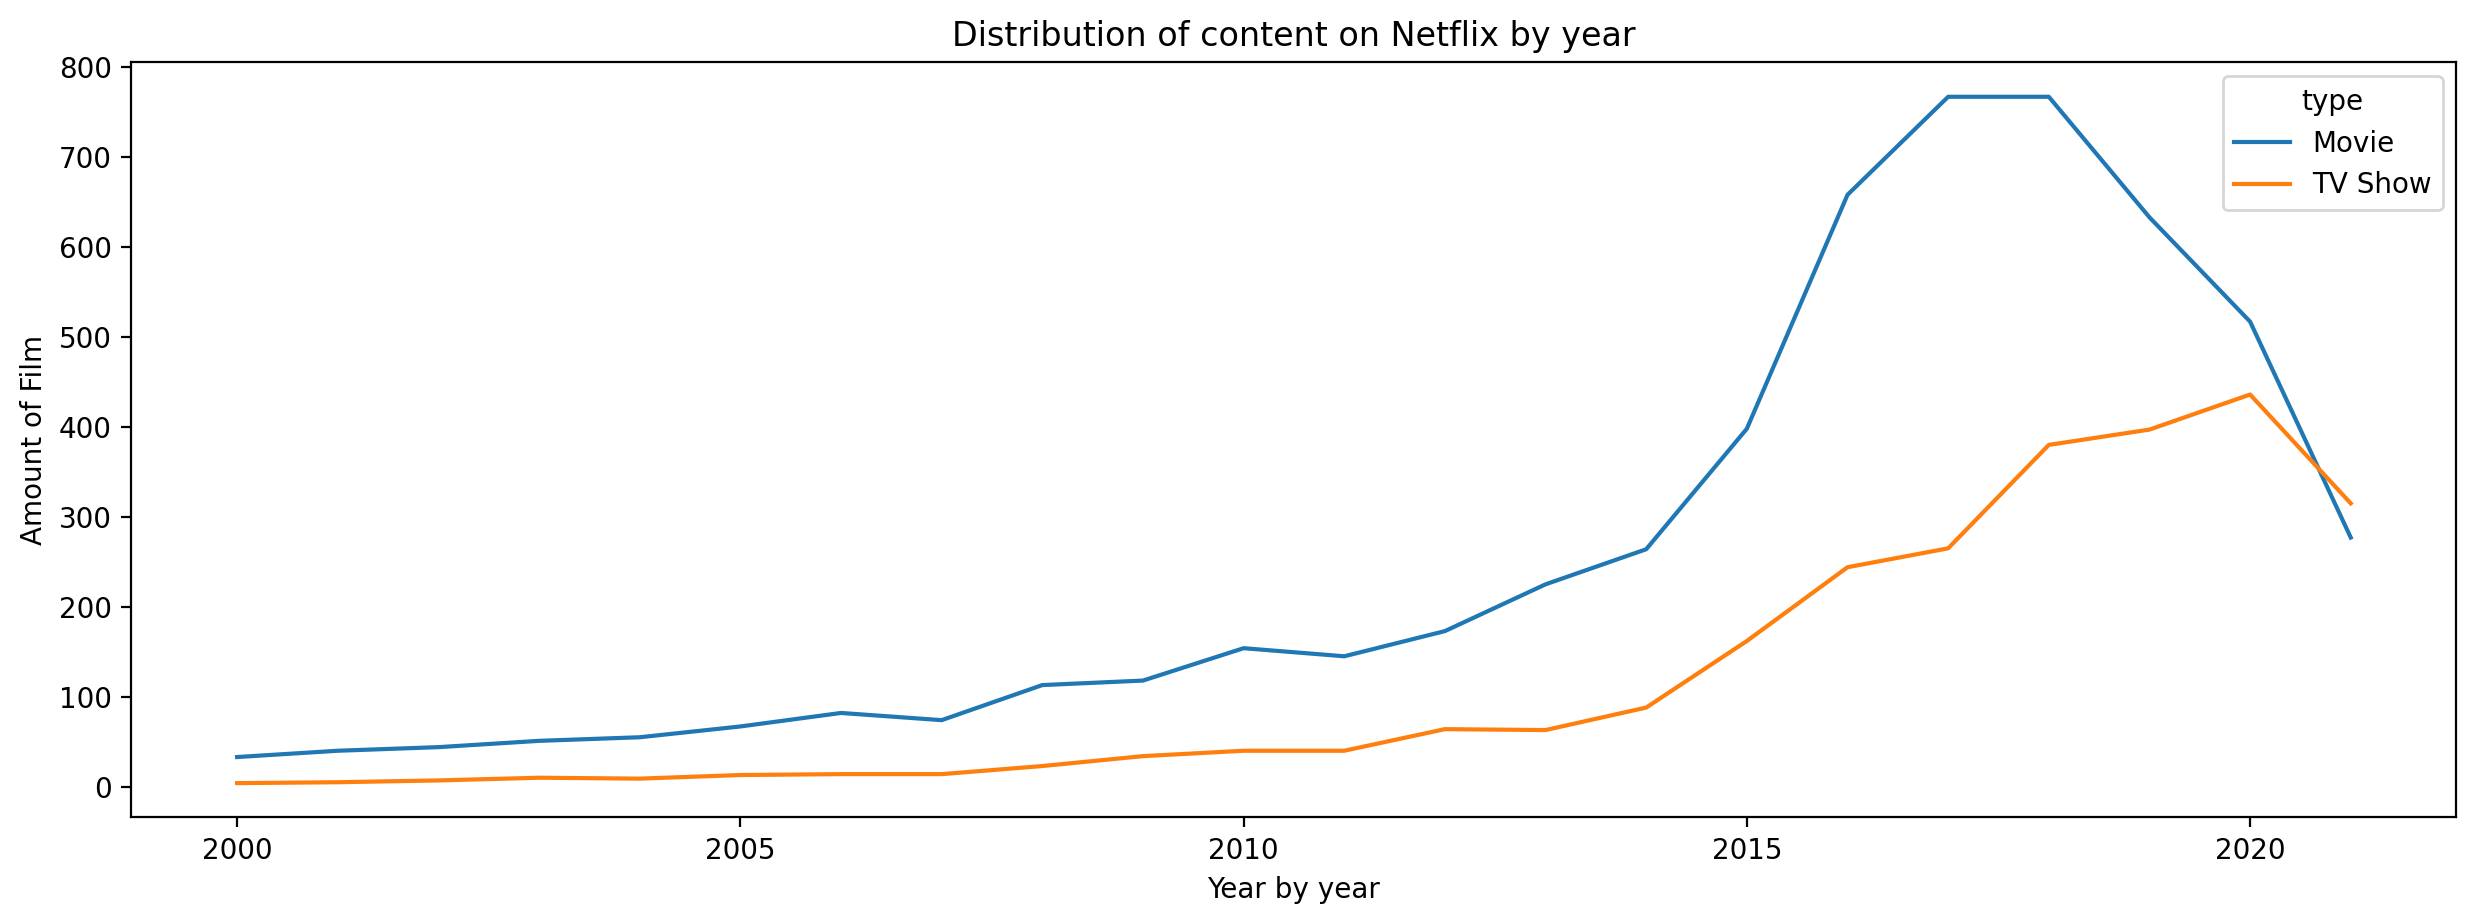

In [156]:
df4 = df.groupby(['release_year','type']).agg({'title':'count'}).reset_index()
df4 = df4.loc[df4.release_year>=2000]
plt.figure(figsize=(15,5),dpi=200)
sns.lineplot(data=df4,x='release_year',y='title',hue='type');
plt.title("Distribution of content on Netflix by year")
plt.ylabel('Amount of Film')
plt.xlabel('Year by year')

# Length of treding film on Netflix

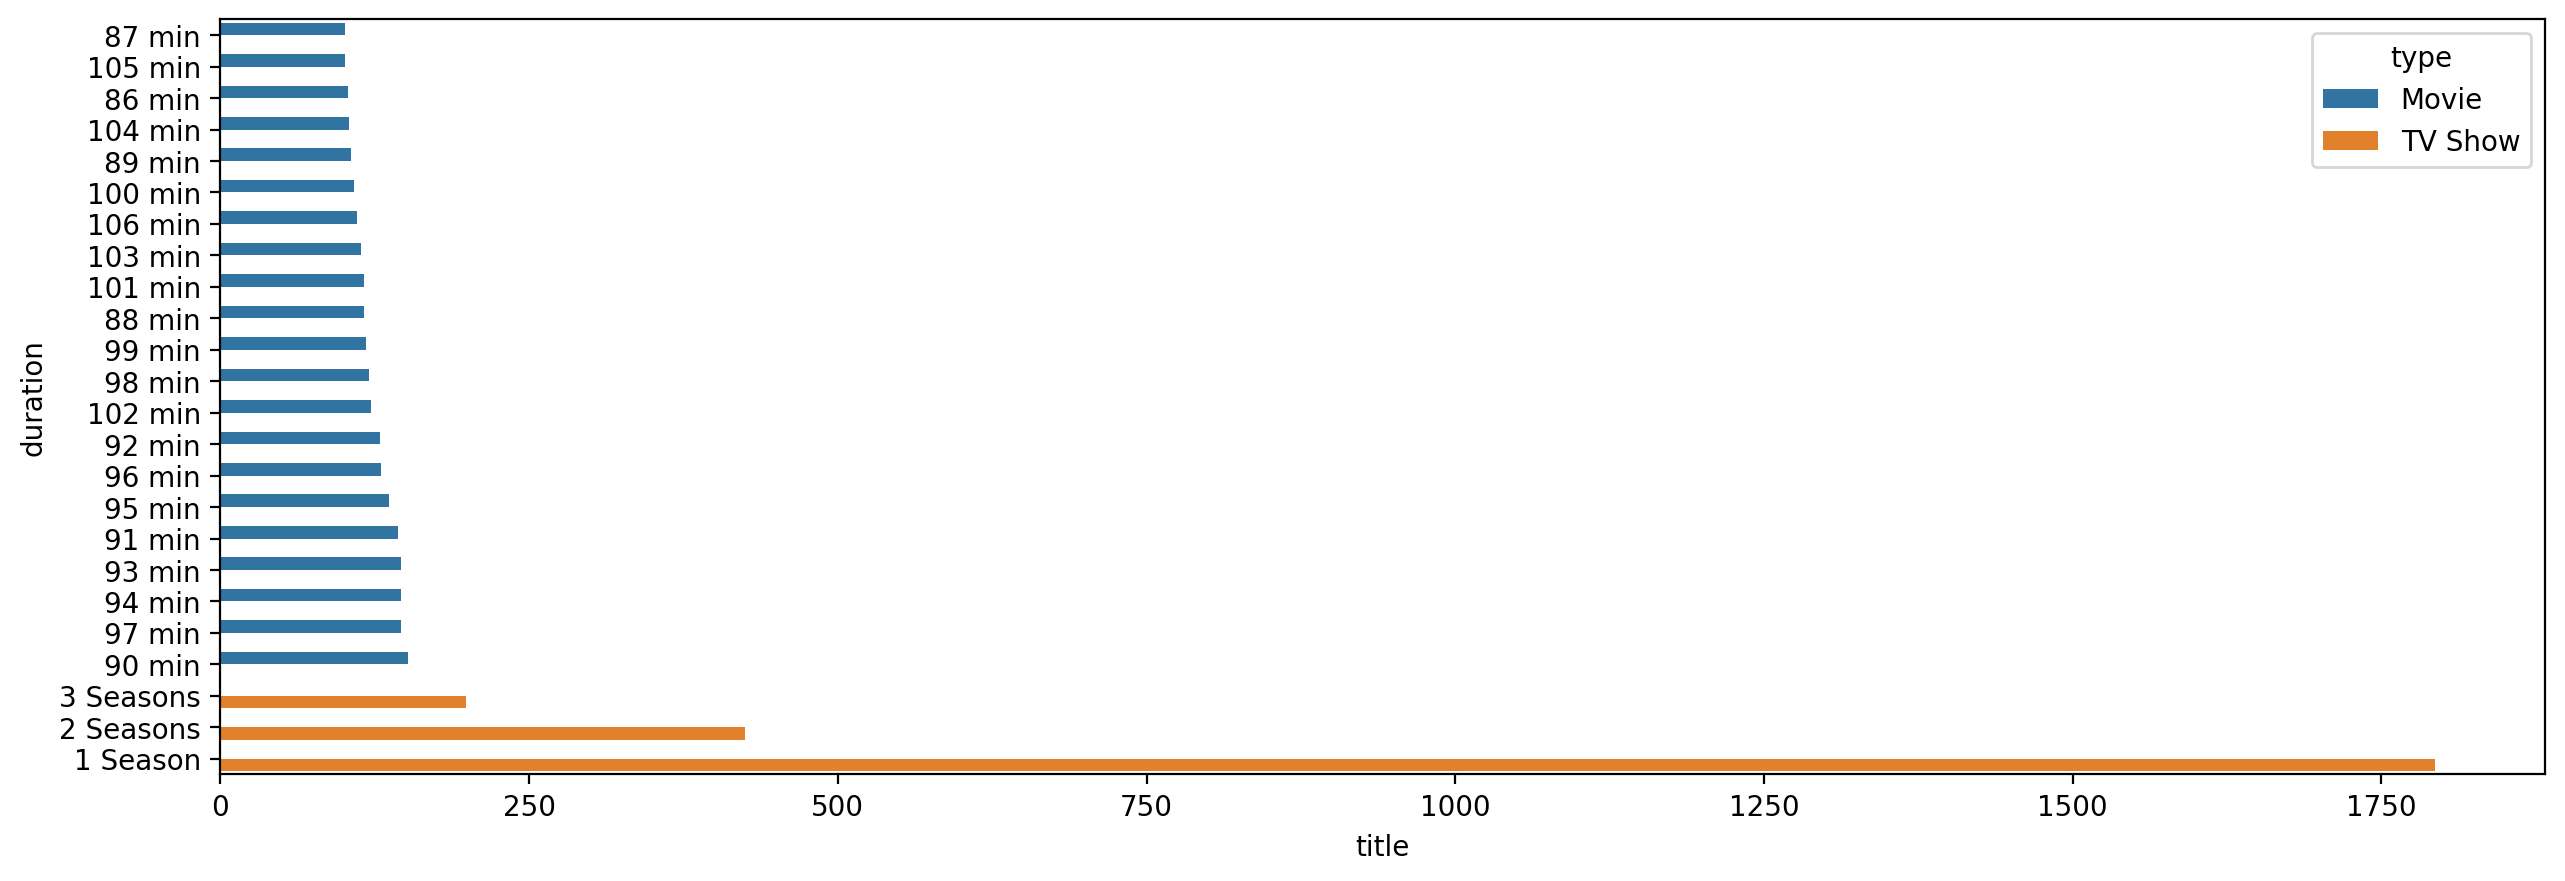

In [190]:
df5 = df.groupby(['duration','type']).agg({'title':'count'}).sort_values(by='title').reset_index()
df5 = df5.loc[df5.title>100]
plt.figure(figsize=(15,5),dpi=200)
sns.barplot(data=df5,x='title',y='duration',hue='type');
